In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 5]

# Loading the data

In [4]:
!ls ../input_data/

gender_submission.csv test.csv              train.csv


In [5]:
train = pd.read_csv('../input_data/train.csv')
test = pd.read_csv('../input_data/train.csv')

In [6]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Features
From the competetion documentation

|Feature | Explanation | Values |
|--------|-------------|--------|
|survival|	Survival	|0 = No, 1 = Yes|
|pclass|	Ticket class	|1 = 1st, 2 = 2nd, 3 = 3rd|
|sex|	Sex| male/female|
|Age|	Age| in years	|
|sibsp|	# of siblings / spouses aboard the Titanic| numeric|	
|parch|	# of parents / children aboard the Titanic|	numeric|
|ticket|	Ticket number	| string|
|fare|	Passenger fare	| numeric |
|cabin|	Cabin number	| string|
|embarked|	Port of Embarkation|	C = Cherbourg, Q = Queenstown, S = Southampton|

**Notes**
pclass: A proxy for socio-economic status (SES)

1st = Upper

2nd = Middle

3rd = Lower


age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5


sibsp: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

# Data Exploration

In [7]:
print('DataSet Size')
train.shape

DataSet Size


(891, 12)

In [8]:
print("Number of missing values")
pd.DataFrame(train.isna().sum(axis=0)).T

Number of missing values


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,0,0,0,0,177,0,0,0,0,687,2


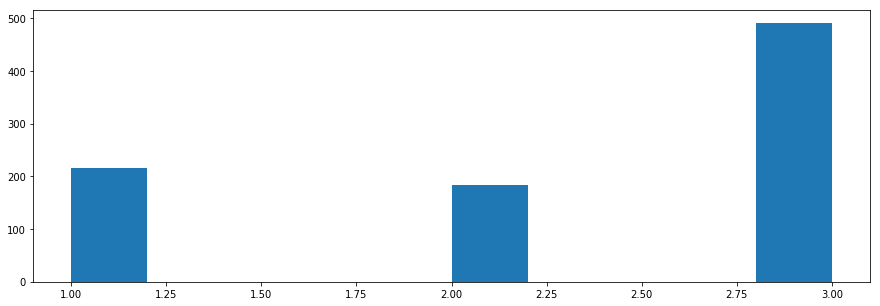

In [9]:
train['Pclass'].hist(grid=False)

In [10]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [34]:
print('Numaber of missing Cabin strings per class')
train[['Pclass', 'Cabin']].groupby('Pclass').agg(lambda x: x.isna().sum())

Numaber of missing Cabin strings per class


,Cabin
Pclass,
1,40
2,168
3,479


In [21]:
print('Numaber of missing Age per class')
train[['Pclass', 'Age']].groupby('Pclass').agg(lambda x: x.isna().sum())

Numaber of missing Age per class


,Age
Pclass,
1,30.0
2,11.0
3,136.0


In [40]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [24]:
print('Whats the influence of the port?')
train[['Embarked', 'Survived']].groupby('Embarked').agg(lambda x: x.sum())

Whats the influence of the port?


,Survived
Embarked,
C,93
Q,30
S,217


In [59]:
print('Relative surival rate per port')
train[['Embarked', 'Survived']].groupby('Embarked').agg(lambda x: x.sum())['Survived'] / train['Embarked'].value_counts()

Relative surival rate per port


C    0.553571
Q    0.389610
S    0.336957
dtype: float64

In [61]:
print('Number of Pclass per port')
train[['Pclass', 'Embarked']].groupby('Embarked').apply(lambda x: x['Pclass'].value_counts(sort=False))

Number of Pclass per port


Pclass,1,2,3
Embarked,,,
C,85,17,66
Q,2,3,72
S,127,164,353


In [16]:
# Mark if a cabin is known or not
train['UnknownCabin'] = train['Cabin'].isna()
train['UnknownAge'] = train['Age'].isna()
train['Sp-Pa'] = train['SibSp'] - train['Parch']

In [17]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,noSe,Sp-Pa,KnownCabin,UnknownCabin,UnknownAge
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.058468,-0.058468,0.019919,-0.019919,-0.020167
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.098615,-0.098615,0.316912,-0.316912,-0.092197
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.072256,0.072256,-0.725541,0.725541,0.172933
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.126271,-0.126271,0.249732,-0.249732,NaN
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.723359,0.723359,-0.040460,0.040460,0.018958
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.328181,-0.328181,0.036987,-0.036987,-0.124104
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.001661,0.001661,0.482075,-0.482075,-0.100707
noSe,-0.058468,-0.098615,0.072256,-0.126271,0.723359,-0.328181,0.001661,1.000000,1.000000,-0.070071,0.070071,0.113857
Sp-Pa,-0.058468,-0.098615,0.072256,-0.126271,0.723359,-0.328181,0.001661,1.000000,1.000000,-0.070071,0.070071,0.113857
KnownCabin,0.019919,0.316912,-0.725541,0.249732,-0.040460,0.036987,0.482075,-0.070071,-0.070071,1.000000,-1.000000,-0.144111


## Correlation Interpretation
* Pclass: the higher the pclass (worse class) decreases the chance of survival significantly (the riches first)
* Age: higher age decreases survival slightly (the children first)
* SipSp: more siblings has a light negative effect on survival (bigger families have it more difficult?)
* Parch: having more parent figures increases the chance of survival
* Fare: a higher fare increases the chance of survival significantly

Pclass
1    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
3    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

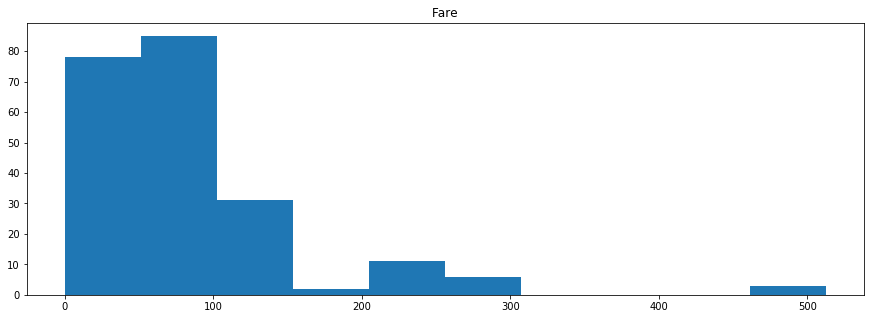

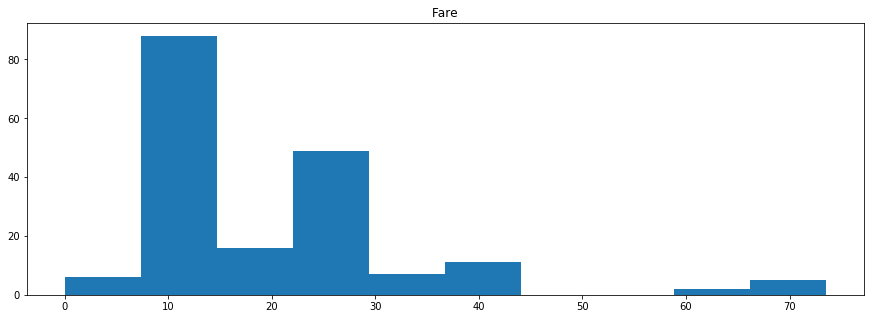

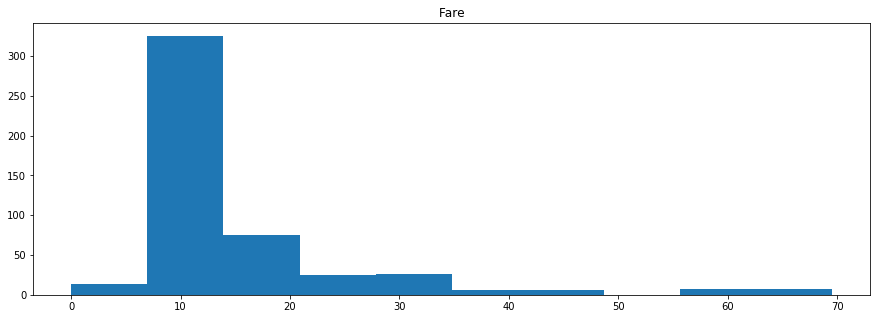

In [18]:
train[['Pclass', 'Fare']].groupby('Pclass').hist(grid=False)

Pclass
1    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
3    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

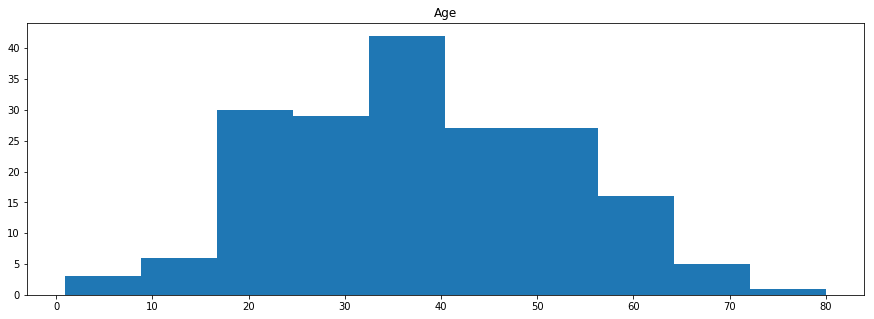

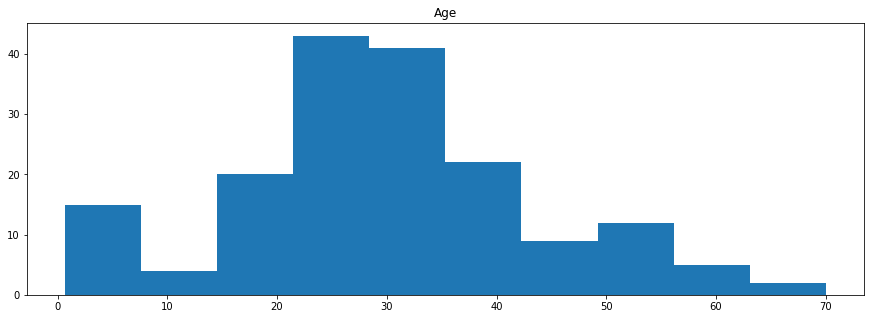

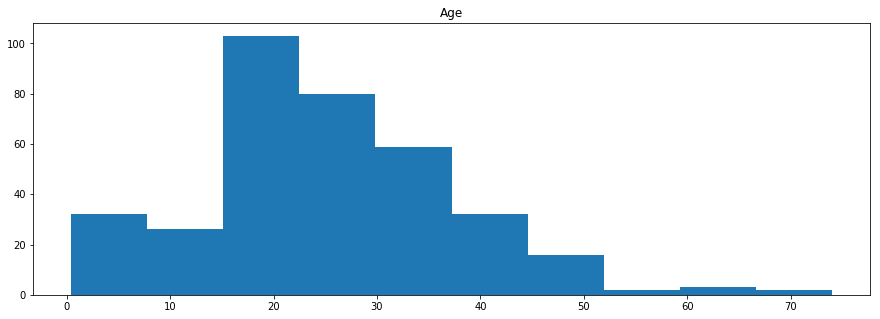

In [19]:
train[['Pclass', 'Age']].groupby('Pclass').hist(grid=False)

I guess many of the missing age records belong to young travelers ...